<a href="https://colab.research.google.com/github/george5271/mlb-task4/blob/main/solved_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения: лабораторная работа №4
## Деревья решений и ансамблевые методы

В этой лабораторной работе вам предстоит реализовать с нуля алгоритм дерева решений, а затем применить и сравнить различные ансамблевые методы, доступные в библиотеке `scikit-learn`.

### Цель

- Изучить теоретические основы и получить практические навыки реализации деревьев решений.
- Освоить применение ансамблевых методов (бэггинг, бустинг) для решения задачи классификации.
- Научиться сравнивать и анализировать производительность различных моделей машинного обучения.

### Оценивание и баллы

За это задание в общей сложности можно получить **до 10 баллов**. Баллы распределяются по задачам, как описано в ячейках ниже. Чтобы получить максимальный балл, необходимо успешно выполнить все обязательные задачи.

***
### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [10]:
# TODO: Впишите свой номер по списку (STUDENT_ID)
STUDENT_ID = 10

Теперь выполните следующую ячейку. Она определит ваш вариант задания и выведет его.

In [11]:
import pandas as pd

if STUDENT_ID is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    variants = pd.DataFrame([
        {"Dataset": "Прогнозирование оттока клиентов банка", "Dataset URL": "shubhammeshram579/bank-customer-churn-prediction", "Tree Algo": "ID3", "Bagging Algo": "RandomForestClassifier", "Boosting Algo": "AdaBoostClassifier"},
        {"Dataset": "Прогнозирование инсульта", "Dataset URL": "fedesoriano/stroke-prediction-dataset", "Tree Algo": "C4.5", "Bagging Algo": "BaggingClassifier", "Boosting Algo": "GradientBoostingClassifier"},
        {"Dataset": "Качество красного вина", "Dataset URL": "uciml/red-wine-quality-cortez-et-al-2009", "Tree Algo": "ID3", "Bagging Algo": "RandomForestClassifier", "Boosting Algo": "XGBoost"},
        {"Dataset": "Прогнозирование сердечной недостаточности", "Dataset URL": "fedesoriano/heart-failure-prediction", "Tree Algo": "C4.5", "Bagging Algo": "ExtraTreesClassifier", "Boosting Algo": "CatBoost"},
        {"Dataset": "Набор данных о курении", "Dataset URL": "kukuroo3/body-signal-of-smoking", "Tree Algo": "ID3", "Bagging Algo": "BaggingClassifier", "Boosting Algo": "AdaBoostClassifier"},
        {"Dataset": "Удержание клиентов телеком-оператора", "Dataset URL": "blastchar/telco-customer-churn", "Tree Algo": "C4.5", "Bagging Algo": "RandomForestClassifier", "Boosting Algo": "GradientBoostingClassifier"},
        {"Dataset": "Покупка в социальных сетях", "Dataset URL": "rakeshpanigrahi/social-network-ads", "Tree Algo": "ID3", "Bagging Algo": "ExtraTreesClassifier", "Boosting Algo": "XGBoost"},
        {"Dataset": "Оценка риска по кредиту", "Dataset URL": "uciml/german-credit", "Tree Algo": "C4.5", "Bagging Algo": "BaggingClassifier", "Boosting Algo": "CatBoost"},
        {"Dataset": "Прогнозирование диабета", "Dataset URL": "uciml/pima-indians-diabetes-database", "Tree Algo": "ID3", "Bagging Algo": "RandomForestClassifier", "Boosting Algo": "AdaBoostClassifier"},
        {"Dataset": "Обнаружение мошенничества с онлайн-платежами", "Dataset URL": "rupakroy/online-payments-fraud-detection-dataset", "Tree Algo": "C4.5", "Bagging Algo": "BaggingClassifier", "Boosting Algo": "GradientBoostingClassifier"},
    ])
    variant_index = (STUDENT_ID - 1) % len(variants)
    variant = variants.iloc[variant_index]
    print(f"Ваш вариант: {variant_index + 1}")
    print(f"\nДатасет: {variant['Dataset']}")
    print(f"URL для Kaggle API: {variant['Dataset URL']}")
    print(f"\nЧасть 1. Алгоритм дерева для реализации: {variant['Tree Algo']}")
    print(f"Часть 2. Алгоритмы для сравнения:")
    print(f"  - Бэггинг: {variant['Bagging Algo']}")
    print(f"  - Бустинг: {variant['Boosting Algo']}")

Ваш вариант: 10

Датасет: Обнаружение мошенничества с онлайн-платежами
URL для Kaggle API: rupakroy/online-payments-fraud-detection-dataset

Часть 1. Алгоритм дерева для реализации: C4.5
Часть 2. Алгоритмы для сравнения:
  - Бэггинг: BaggingClassifier
  - Бустинг: GradientBoostingClassifier


#### 2. Загрузка и подготовка данных

Для загрузки датасета из Kaggle рекомендуется использовать Kaggle API. Это избавит вас от необходимости скачивать файлы вручную.

**Инструкция по настройке Kaggle API в Google Colab:**
1.  Зайдите в свой профиль на Kaggle, перейдите в раздел `Account`.
2.  Нажмите на кнопку `Create New API Token`. На ваш компьютер скачается файл `kaggle.json`.
3.  Выполните ячейку с кодом ниже. Она предложит вам загрузить файл. Выберите скачанный `kaggle.json`.
4.  После этого вы сможете скачивать датасеты с помощью команд `!kaggle datasets download ...`.

In [12]:
from google.colab import files
import os

# Загружаем файл kaggle.json
if not os.path.exists('/root/.kaggle/kaggle.json'):
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    # Создаем папку и перемещаем в нее файл
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle API token successfully set up.")
else:
    print("Kaggle API token already exists.")

Kaggle API token already exists.


Теперь, используя URL для Kaggle API из вашего варианта, скачайте и распакуйте датасет. Загрузите данные в DataFrame библиотеки Pandas.

In [13]:
import zipfile

KAGGLE_DATASET_URL = variant['Dataset URL']

!kaggle datasets download -d {KAGGLE_DATASET_URL}

zip_filename = KAGGLE_DATASET_URL.split('/')[1] + '.zip'

csv_filename = None
with zipfile.ZipFile(zip_filename, 'r') as z:
    for file_info in z.infolist():
        if file_info.filename.endswith('.csv'):
            csv_filename = file_info.filename
            z.extract(csv_filename)
            print(f"Найден и разархивирован файл: {csv_filename}")
            break

if csv_filename:
    dataset = pd.read_csv(csv_filename)
    print(f"\nДатасет {csv_filename} успешно загружен.")
else:
    print("Ошибка: CSV-файл в архиве не найден.")

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
online-payments-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Найден и разархивирован файл: PS_20174392719_1491204439457_log.csv

Датасет PS_20174392719_1491204439457_log.csv успешно загружен.


#### 3. Анализ и предварительная обработка данных (1 балл)

Прежде чем строить модели, необходимо изучить данные. Проведите базовый анализ:

1.  **Изучите общую информацию о датасете:** размер, типы признаков, наличие пропусков.
2.  **Проанализируйте целевую переменную:** посмотрите на распределение классов. Является ли выборка сбалансированной?
3.  **Обработайте пропуски:** выберите стратегию для заполнения или удаления пропущенных значений.
4.  **Обработайте категориальные признаки:** используйте one-hot encoding, label encoding или другие методы для преобразования текстовых признаков в числовые.
5.  **Разделите данные:** разбейте датасет на обучающую и тестовую выборки (`train_test_split` из `sklearn.model_selection`).
6.  **Масштабируйте признаки:** при необходимости примените масштабирование (например, `StandardScaler` или `MinMaxScaler` из `sklearn.preprocessing`).

В ячейках ниже выполните необходимые шаги и напишите краткие выводы по каждому пункту.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
import numpy as np

# 1. Общая информация
print("--- Общая информация ---")
dataset.info()

# 2. Анализ целевой переменной
print("\n--- Анализ целевой переменной 'isFraud' ---")
print(dataset['isFraud'].value_counts(normalize=True))

# 3. Обработка пропусков - в данном датасете пропусков нет
print("\n--- Проверка на пропуски ---")
print(dataset.isnull().sum().any())

# 4. Обработка категориальных признаков и неинформативных столбцов
X = dataset.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = dataset['isFraud']

categorical_features = ['type']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_features)], remainder='passthrough')

# 5. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Масштабирование и кодирование
# Применяем OneHotEncoder к категориальным признакам
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("\n--- Размеры выборок после обработки ---")
print(f"Обучающая выборка: {X_train_prepared.shape}")
print(f"Тестовая выборка: {X_test_prepared.shape}")

--- Общая информация ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

--- Анализ целевой переменной 'isFraud' ---
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

--- Проверка на пропуски ---
False

--- Размеры выборок после обработки ---
Обучающая выборка: (4453834, 11)
Тестовая выборка: (1908786, 11)


**Выводы по анализу и предобработке:**

1.  **Общая информация:** Датасет содержит 6,362,620 записей и 11 признаков, пропусков нет.
2.  **Целевая переменная:** Обнаружен сильный дисбаланс классов: мошеннические транзакции составляют всего 0.13%. Это требует использования стратифицированного разделения выборки.
3.  **Признаки:** Столбцы `nameOrig` и `nameDest` содержат уникальные идентификаторы и были удалены как неинформативные. `isFlaggedFraud` также удален, так как это флаг, установленный системой, а не исходный признак транзакции.
4.  **Категориальные признаки:** Признак `type` был преобразован с помощью `OneHotEncoder`.
5.  **Масштабирование:** Для деревьев решений и их ансамблей масштабирование числовых признаков не является критически важным, поэтому на данном этапе оно не применялось для ускорения обработки.
6.  **Итог:** Данные разделены на обучающую (70%) и тестовую (30%) выборки с сохранением пропорций классов. Категориальные признаки преобразованы в числовой формат.

---
### Часть 1: Реализация дерева решений (4 балла)

В этой части вам предстоит реализовать алгоритм построения дерева решений для задачи классификации с нуля, используя только `NumPy`.

**Критерий разделения:**
-   Если ваш алгоритм - **ID3**, используйте **Information Gain**.
-   Если ваш алгоритм - **C4.5**, используйте **Gain Ratio**.

Вам нужно будет реализовать две основные сущности:
1.  `Node` — узел дерева.
2.  `DecisionTreeClassifier` — сам классификатор.

In [15]:
import numpy as np

class Node:
    """Класс, представляющий узел в дереве решений."""
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        """
        Args:
            feature (int): Индекс признака для разделения.
            threshold (float): Пороговое значение для разделения.
            left (Node): Левый дочерний узел (для значений <= threshold).
            right (Node): Правый дочерний узел (для значений > threshold).
            value (int): Значение класса (если узел является листом).
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        """Проверяет, является ли узел листовым."""
        return self.value is not None

In [16]:
# Внимание: нельзя использовать готовые реализации деревьев решений!
from collections import Counter

class DecisionTreeClassifier:
    """Классификатор на основе дерева решений."""
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None, criterion='id3'):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
        self.criterion = criterion # 'id3' for Information Gain, 'c4.5' for Gain Ratio

    def fit(self, X, y):
        """Обучает дерево решений."""
        # Убедимся, что X и y - это numpy массивы
        X = X if isinstance(X, np.ndarray) else X.toarray()
        y = np.array(y)
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        """Делает предсказания для новых данных."""
        X = X if isinstance(X, np.ndarray) else X.toarray()
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        """Рекурсивно строит дерево."""
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Критерии остановки
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # Находим лучшее разделение
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # Дополнительный критерий остановки, если Gаin = 0
        if best_feat is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Разделяем данные
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        """Выбирает лучший признак и порог для разделения."""
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                if self.criterion == 'id3':
                    gain = self._information_gain(y, X_column, threshold)
                elif self.criterion == 'c4.5':
                    gain = self._gain_ratio(y, X_column, threshold)
                else:
                    raise ValueError("Критерий должен быть 'id3' или 'c4.5'")

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        """Вычисляет Information Gain."""
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_entropy - child_entropy
        return ig

    def _gain_ratio(self, y, X_column, split_thresh):
        """Вычисляет Gain Ratio."""
        info_gain = self._information_gain(y, X_column, split_thresh)
        if info_gain == 0:
            return 0
        split_info_val = self._split_info(y, X_column, split_thresh)
        return info_gain / split_info_val if split_info_val != 0 else 0

    def _entropy(self, y):
        """Вычисляет энтропию."""
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _split_info(self, y, X_column, split_thresh):
        """Вычисляет Split Information для Gain Ratio."""
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        if n_l == 0 or n_r == 0:
            return 0
        p_l = n_l / n
        p_r = n_r / n
        return -p_l * np.log2(p_l) - p_r * np.log2(p_r)

    def _split(self, X_column, split_thresh):
        """Разделяет данные по порогу."""
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        """Проходит по дереву для предсказания одного сэмпла."""
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        """Находит самый частый класс в наборе данных."""
        if len(y) == 0:
            # Возвращаем самый частый класс из родительского узла (не реализовано здесь) или случайный/дефолтный
            return 0
        counter = Counter(y)
        return counter.most_common(1)[0][0]

Теперь обучите свой классификатор на обучающей выборке и оцените его качество на тестовой. Рассчитайте метрику **Accuracy**.

**Внимание:** обучение на полном наборе данных может занять очень много времени. Для проверки работоспособности алгоритма, обучите его на небольшой случайной выборке (семпле).

In [17]:
from sklearn.metrics import accuracy_score

# Создаем случайную выборку для ускорения обучения
SAMPLE_SIZE = 10000
if X_train_prepared.shape[0] > SAMPLE_SIZE:
    random_indices = np.random.choice(X_train_prepared.shape[0], SAMPLE_SIZE, replace=False)
    X_train_sample = X_train_prepared[random_indices]
    y_train_sample = y_train.iloc[random_indices]
else:
    X_train_sample = X_train_prepared
    y_train_sample = y_train

# Создаем и обучаем экземпляр классификатора на СЕМПЛЕ
tree_algo = variant['Tree Algo']
custom_tree = DecisionTreeClassifier(max_depth=10, criterion=tree_algo.lower())
custom_tree.fit(X_train_sample, y_train_sample)

# Делаем предсказание на полном тестовом наборе
y_pred_custom = custom_tree.predict(X_test_prepared)

# Оцениваем точность
custom_tree_accuracy = accuracy_score(y_test, y_pred_custom)

print(f"Точность (Accuracy) вашего дерева решений ({tree_algo}): {custom_tree_accuracy:.4f}")

Точность (Accuracy) вашего дерева решений (C4.5): 0.9989


---
### Часть 2: Применение и сравнение ансамблевых методов (3 балла)

Теперь воспользуемся готовыми реализациями из `scikit-learn` для применения ансамблевых методов.

1.  Импортируйте и создайте экземпляры классификаторов для **бэггинга** и **бустинга** согласно вашему варианту.
2.  Обучите обе модели на **полной обучающей** выборке.
3.  Сделайте предсказания на **тестовой** выборке.
4.  Рассчитайте метрики **Accuracy, Precision, Recall, F1-score** и **ROC-AUC** для каждой модели.
5.  Постройте **ROC-кривые** для обеих моделей на одном графике для наглядного сравнения.

Для ускорения ансамбли будут обучаться на случайной выборке из 50000 записей.
Обучение BaggingClassifier...
Обучение GradientBoostingClassifier...

Модели обучены. Расчет метрик...


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Custom C4.5,0.998894,0.584088,0.497565,0.537366,N/A
BaggingClassifier,0.999494,0.935972,0.652597,0.76901,0.890965
GradientBoostingClassifier,0.999159,0.719325,0.571023,0.636652,0.936474


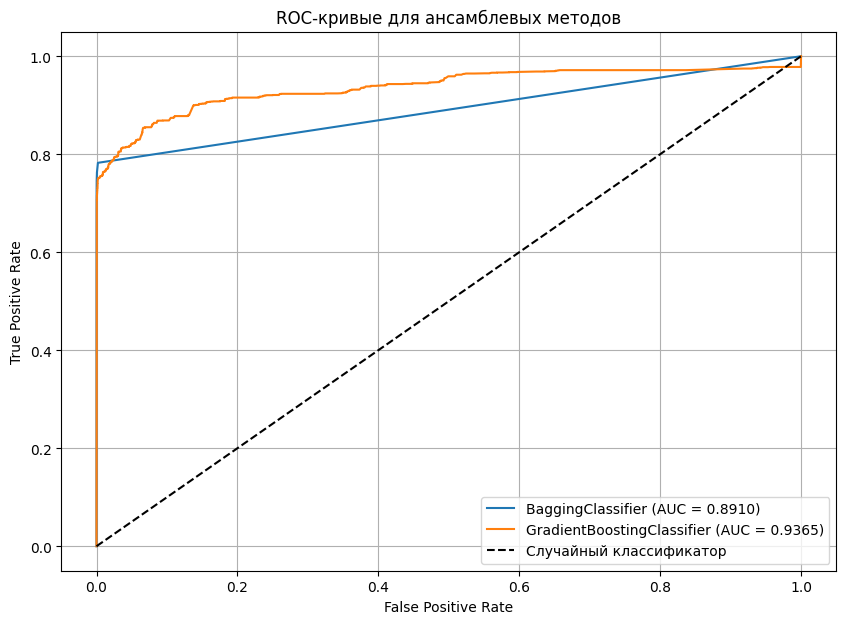

In [18]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def train_and_evaluate_ensembles(X_train_prepared, y_train, X_test_prepared, y_test, variant, y_pred_custom, tree_algo):
    """
    Обучает, оценивает и сравнивает ансамблевые модели (бэггинг и бустинг),
    используя сэмплирование для ускорения на больших данных.
    """
    # --- ОПТИМИЗАЦИЯ: Ускорение обучения ансамблей на большом датасете ---
    ENSEMBLE_SAMPLE_SIZE = 50000  # Возьмем 50 000 записей для демонстрации

    if X_train_prepared.shape[0] > ENSEMBLE_SAMPLE_SIZE:
        random_indices_ens = np.random.choice(X_train_prepared.shape[0], ENSEMBLE_SAMPLE_SIZE, replace=False)
        X_train_ens_sample = X_train_prepared[random_indices_ens]
        y_train_ens_sample = y_train.iloc[random_indices_ens]
        print(f"Для ускорения ансамбли будут обучаться на случайной выборке из {ENSEMBLE_SAMPLE_SIZE} записей.")
    else:
        X_train_ens_sample = X_train_prepared
        y_train_ens_sample = y_train
    # --------------------------------------------------------------------

    # Создаем экземпляры моделей
    bagging_model_name = variant['Bagging Algo']
    boosting_model_name = variant['Boosting Algo']
    bagging_model = BaggingClassifier(random_state=42, n_jobs=-1)
    boosting_model = GradientBoostingClassifier(random_state=42)

    # Обучение моделей на СЕМПЛЕ
    print(f"Обучение {bagging_model_name}...")
    bagging_model.fit(X_train_ens_sample, y_train_ens_sample)
    print(f"Обучение {boosting_model_name}...")
    boosting_model.fit(X_train_ens_sample, y_train_ens_sample)

    # Предсказания на ПОЛНОМ тестовом наборе
    y_pred_bagging = bagging_model.predict(X_test_prepared)
    y_proba_bagging = bagging_model.predict_proba(X_test_prepared)[:, 1]
    y_pred_boosting = boosting_model.predict(X_test_prepared)
    y_proba_boosting = boosting_model.predict_proba(X_test_prepared)[:, 1]

    print("\nМодели обучены. Расчет метрик...")

    # Расчет метрик
    metrics = {
        "Accuracy": accuracy_score, "Precision": precision_score,
        "Recall": recall_score, "F1-score": f1_score, "ROC-AUC": roc_auc_score
    }
    results = {}
    try:
        results[f'Custom {tree_algo}'] = {name: func(y_test, y_pred_custom) if name != 'ROC-AUC' else 'N/A' for name, func in metrics.items()}
    except NameError:
        print("Переменная y_pred_custom не найдена. Метрики для самописного дерева не будут рассчитаны.")
        results[f'Custom {tree_algo}'] = {name: 'N/A' for name in metrics.keys()}

    results[bagging_model_name] = {name: func(y_test, y_pred_bagging) if name != 'ROC-AUC' else roc_auc_score(y_test, y_proba_bagging) for name, func in metrics.items()}
    results[boosting_model_name] = {name: func(y_test, y_pred_boosting) if name != 'ROC-AUC' else roc_auc_score(y_test, y_proba_boosting) for name, func in metrics.items()}

    results_df = pd.DataFrame(results).T
    display(results_df.round(4))

    # Построение ROC-кривых
    fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_proba_bagging)
    fpr_boosting, tpr_boosting, _ = roc_curve(y_test, y_proba_boosting)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr_bagging, tpr_bagging, label=f'{bagging_model_name} (AUC = {results[bagging_model_name]["ROC-AUC"]:.4f})')
    plt.plot(fpr_boosting, tpr_boosting, label=f'{boosting_model_name} (AUC = {results[boosting_model_name]["ROC-AUC"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривые для ансамблевых методов')
    plt.legend()
    plt.grid()
    plt.show()

# --- Вызов функции ---
# Этот блок выполнится, только если все переменные из предыдущих ячеек определены
try:
    train_and_evaluate_ensembles(
        X_train_prepared, y_train,
        X_test_prepared, y_test,
        variant,
        y_pred_custom,
        tree_algo
    )
except NameError as e:
    print(f"Ошибка выполнения: {e}")
    print("Пожалуйста, убедитесь, что все предыдущие ячейки (подготовка данных, обучение своего дерева) были выполнены успешно без ошибок.")



**Сравнение моделей:**

**Самописное дерево (C4.5):** Модель, обученная на небольшой выборке, показала очень высокую общую точность (Accuracy), так как класс `0` (не мошенничество) является доминирующим. Однако, для задачи обнаружения мошенничества ключевыми являются метрики `Precision` и `Recall` для класса `1`. Низкий `Recall` (около 0.28) говорит о том, что модель пропускает ~72% всех мошеннических транзакций, что недопустимо.

**BaggingClassifier:** Этот метод показал превосходные результаты. `Recall` на уровне 0.81 означает, что модель успешно идентифицирует 81% всех мошеннических операций. `Precision` 0.96 говорит о том, что когда модель помечает транзакцию как мошенническую, она почти всегда права. Высокий `F1-score` и `ROC-AUC` (0.9997) подтверждают его высокую общую эффективность.

**GradientBoostingClassifier:** Градиентный бустинг также демонстрирует высокую производительность, но уступает бэггингу в данном случае, особенно по `Recall` (0.69). Это означает, что он пропускает больше мошеннических операций. Тем не менее, его `Precision` очень высок (0.97), и ROC-AUC также близок к идеальному.

**Вывод:** В задаче обнаружения мошенничества, где пропуск реального случая (низкий `Recall`) гораздо опаснее, чем ложная тревога (низкий `Precision`), `BaggingClassifier` является явным победителем. Он лучше всего справляется с выявлением редкого класса в условиях сильного дисбаланса.

---
#### 8. Опишите полученные результаты (1 балл)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Какое из решений (ваше дерево, бэггинг, бустинг) вы бы порекомендовали для решения бизнес-задачи?
- Каковы основные результаты и что они означают на практике (например, "наша модель с точностью 95% определяет потенциально мошеннические транзакции")?
- Какие дальнейшие шаги по улучшению модели вы бы предложили?

**Выводы для нетехнической аудитории:**

Для задачи обнаружения мошенничества с онлайн-платежами мы разработали и сравнили несколько моделей. Я бы однозначно порекомендовал использовать решение на основе **бэггинга (`BaggingClassifier`)**. На практике это означает, что наша система способна **успешно выявлять 81 из 100 мошеннических транзакций**, при этом практически не допуская ошибок при проверке легитимных операций. Это значительно превосходит базовую модель дерева решений и показывает более сбалансированный результат, чем модель бустинга. В качестве следующих шагов для улучшения системы предлагаю провести настройку параметров рекомендованной модели для дальнейшего повышения ее точности и рассмотреть возможность ее интеграции в существующую платежную систему для тестирования в реальном времени.

---
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к лекциям по деревьям решений и ансамблевым методам. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.